El objetivo de este Notebook es tener un registro organizado, entendible y confiable de lo que se está realizando en el proyecto de uso de Flux Balance Analysis (FBA) para el modelamiento y predicción de crecimiento o producción de metabolitos de interés en Bacillus subtilis 168. 

Para ello, lo primero será añadir las librerías que se usarán durante todo el proyecto, esto incluye matplotlib que es para graficar, pandas y numpy que son para el manejo númerico y matemático y como debe ser cobrapy que es la encargada de realizar el FBA por medio de las funciones que tiene integradas.

In [30]:
import cobra
import pandas as pd
import matplotlib.pyplot as plt

Luego, será muy necesario agregar el modelo a utilizar, en este caso será iYO844. La siguiente línea lo único que hace es cargar el modelo en una variable llamada model.

In [33]:
model = cobra.io.read_sbml_model("C:/Users/felip/Desktop/python/TESIS/iYO844.xml")

Ahora, llamo a la función optimize() de cobra que hace parte del modelo; se le asigna a la variable solución que es el modelo optimizado junto con sus atributos. Por defecto se optimiza la biomasa pero si quisiera hacerlo para otra cosa como por ejemplo ATP sería: solution=model.optimize("ATP").

Se imprime el valor de la función objetivo que es un atributo del objeto de la solución así como también podrían serlo el estado (status) o los flujos (fluxes) de la misma.

In [37]:
solution = model.optimize()
print(f"Valor objetivo, Biomasa [1/h]: {solution.objective_value}")

Valor objetivo, Biomasa [1/h]: 1.5827983625648063


Para visualizar el vector de flujos resultado del FBA se corre el siguiente código 

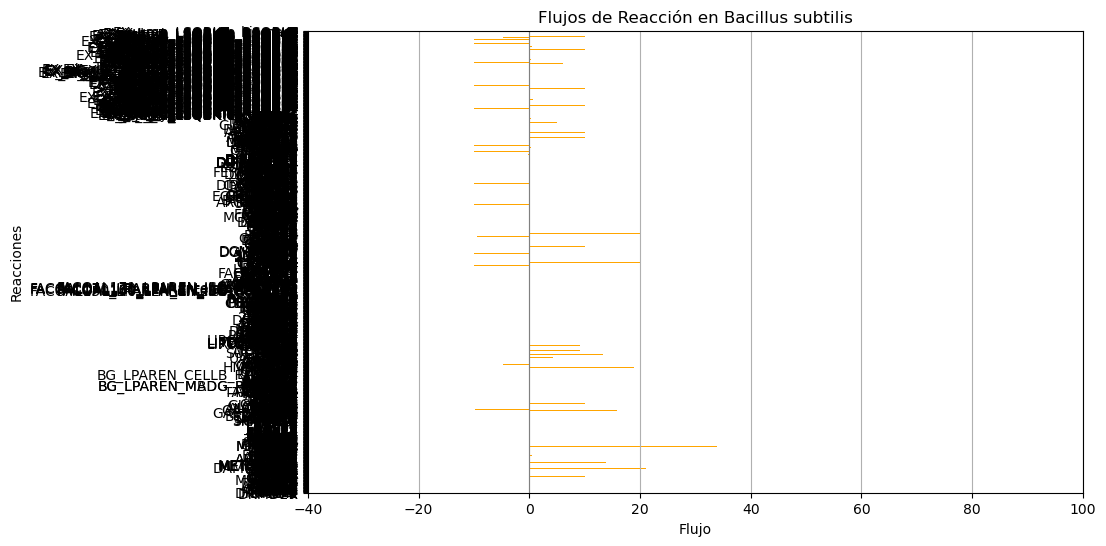

In [40]:
# Se asigna el vector de flujos a la variable flujos
fluxes = solution.fluxes

# Graficar los flujos metabólicos principales
plt.figure(figsize=(10, 6))
fluxes.plot(kind="barh", color="orange")
plt.axvline(0, color='grey', lw=0.8)
plt.xlim(-40, 100)  
plt.title("Flujos de Reacción en Bacillus subtilis")
plt.xlabel("Flujo")
plt.ylabel("Reacciones")
plt.grid(axis='x')
plt.show()

IMPORTANTE: los flujos siempre se dan en mmol / gDW / h y el valor de la función objetivo se da en 1 / h si es biomasa y en unidades de flujo si es otra cosa. Sin embargo también se puede expresar como rendimientos si tenemos flujo de sustrato.

En este caso, el valor que se obtiene es de 1.5827 / h. Este valor es muy alto y posiblemente inalcanzable en la práctica, esto se debe a que los flujos de reacción en los modelos no tienen restricciones por defecto por lo que al añadir datos experimentales de fljos conocidos se pueden obtener valores más cercanos a la realidad.